# Tensorflow Networks
### Regression
We will make a dummy data for feeding in the model. The NN will be trained to predict from the dummy data.

In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


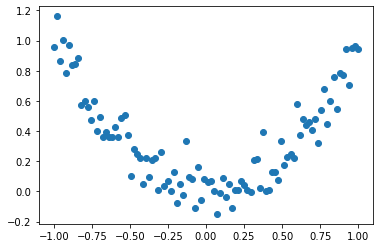

In [20]:


# data initialization
# linspace creates a list with continous intervals of range -1 to 1
# newaxis increases the dimension i.e. changes (1,100) to (100,1)
x = np.linspace(-1,1,100)[:, np.newaxis]
noise = np.random.normal(0,0.1,size=x.shape)
y = np.power(x,2) + noise

# plot the data
plt.scatter(x,y)
plt.show()

In [21]:
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.float32, y.shape)

### Initializing layers in Neural Network

In [34]:
# hidden layer
l1 = tf.layers.dense(tf_x,10,tf.nn.relu)
# output layer
output = tf.layers.dense(l1, 1)

# compute cost
loss = tf.losses.mean_squared_error(tf_y, output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train_op = optimizer.minimize(loss)

C:\Users\HP\AppData\Local\Temp\ipykernel_1760\736347087.py:2: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  l1 = tf.layers.dense(tf_x,10,tf.nn.relu)
C:\Users\HP\AppData\Local\Temp\ipykernel_1760\736347087.py:4: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  output = tf.layers.dense(l1, 1)


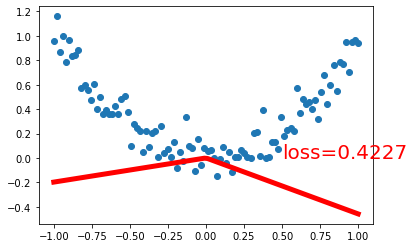

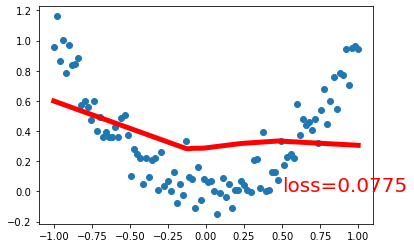

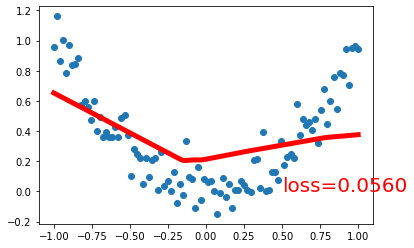

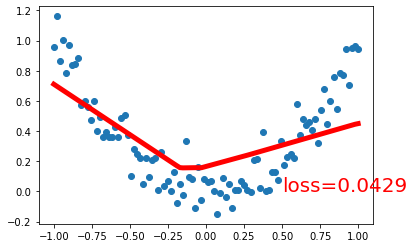

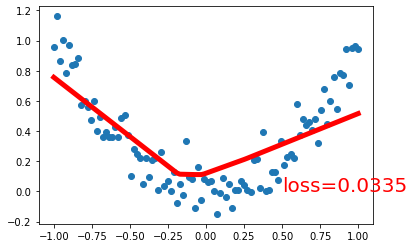

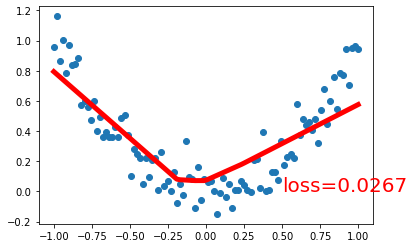

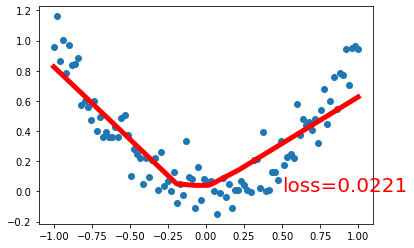

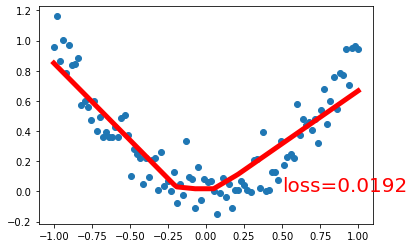

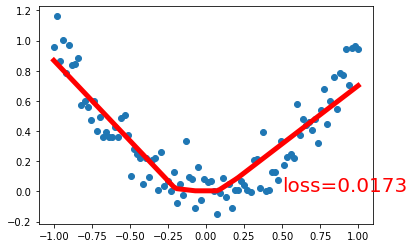

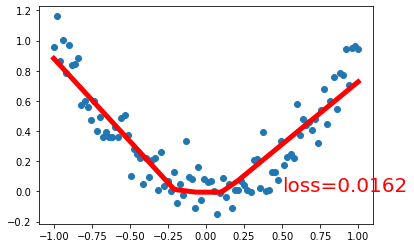

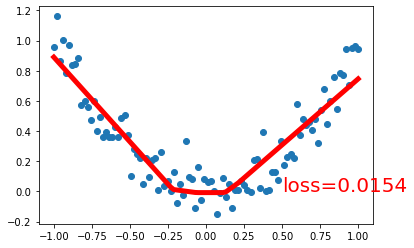

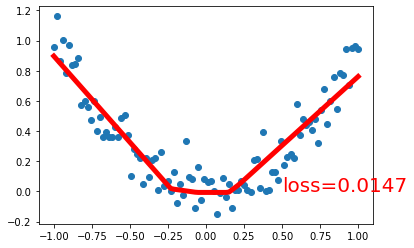

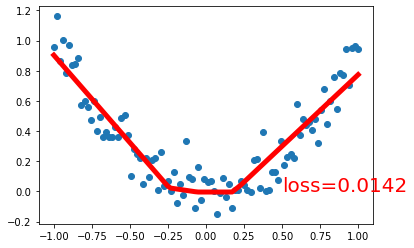

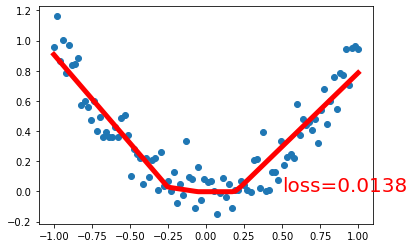

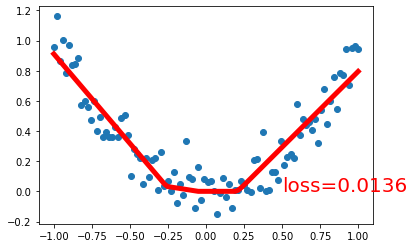

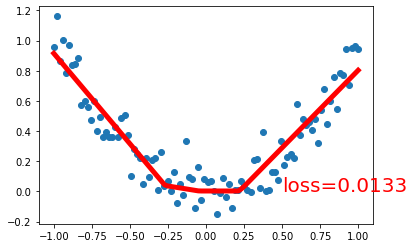

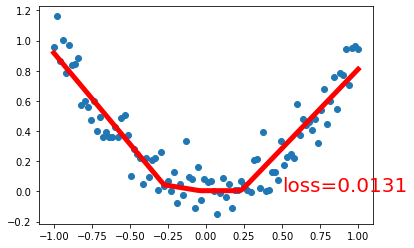

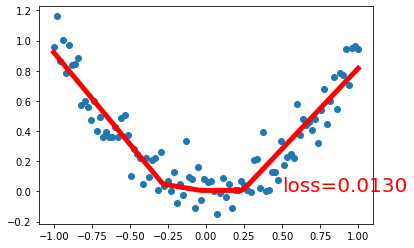

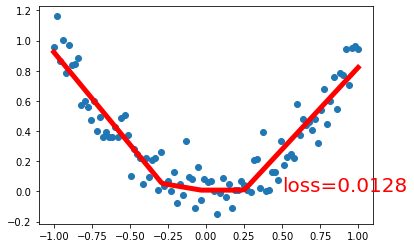

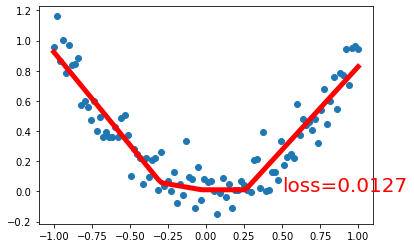

In [35]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

plt.ion()

for step in range(100):
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
    if step%5 == 0:
        plt.cla()
        plt.scatter(x,y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'loss=%.4f' % l, fontdict = {'size': 20, 'color':'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

# Classification
Generating fake data

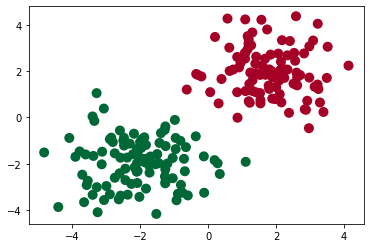

In [43]:
n_data = np.ones((100,2))
# numpy.random.normal draws random samples from a normal(Gaussian) distribution
x0 = np.random.normal(2*n_data,1)      # class0 x shape =(100,2)
y0 = np.zeros(100)                     # class0 y shape =(100,1)
x1 = np.random.normal(-2*n_data, 1)    # class1 x shape =(100,2)
y1 = np.ones(100)                      # class1 y shape =(100,1)
# vertical stacking
x = np.vstack((x0, x1))    # shape (200,2) + some noise
# horizontal stacking
y = np.hstack((y0, y1))    # shape (200, )

plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

In [44]:
# input x and y
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.int32, y.shape)

# Making Neural Network layers

In [47]:
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu) # hidden layer
output = tf.layers.dense(l1, 2)           # output layer

loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)    # cost function
# return (acc, update_op), and create 2 local variable
accuracy = tf.metrics.accuracy(labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

C:\Users\HP\AppData\Local\Temp\ipykernel_1760\4072402878.py:1: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  l1 = tf.layers.dense(tf_x, 10, tf.nn.relu) # hidden layer
C:\Users\HP\AppData\Local\Temp\ipykernel_1760\4072402878.py:2: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  output = tf.layers.dense(l1, 2)           # output layer


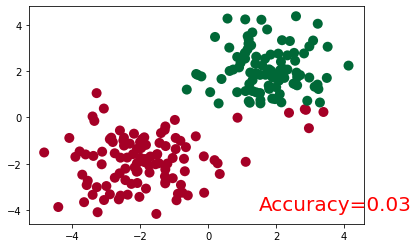

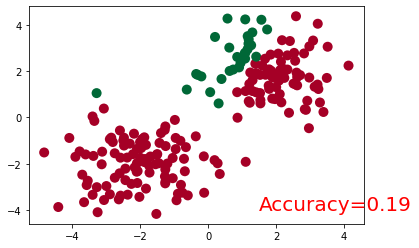

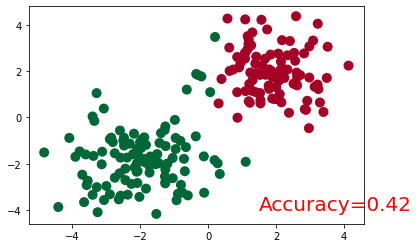

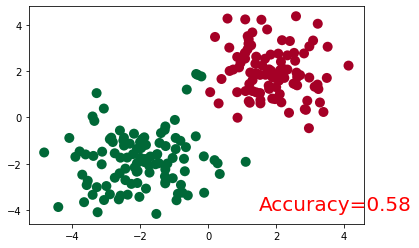

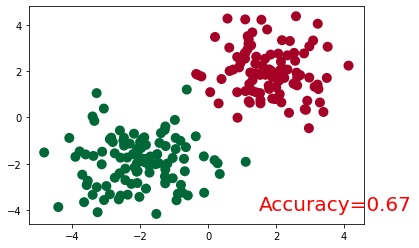

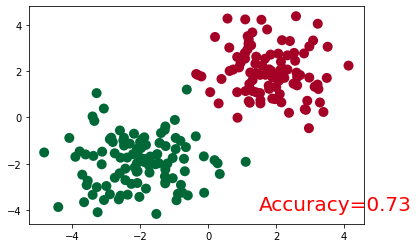

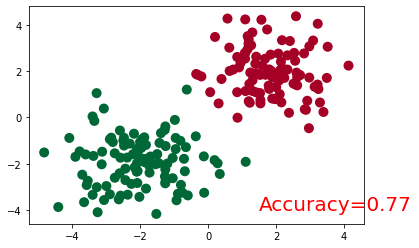

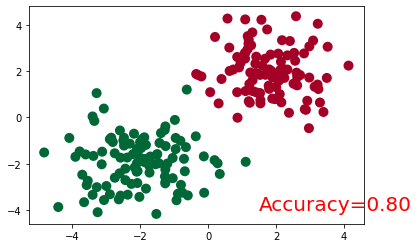

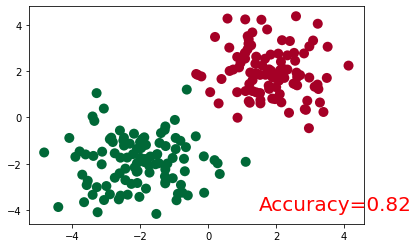

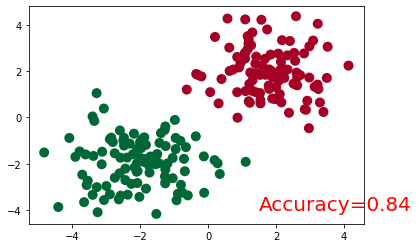

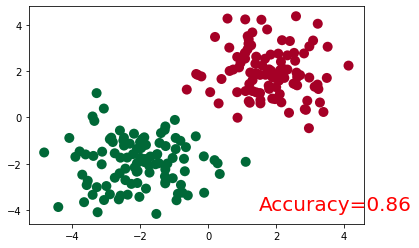

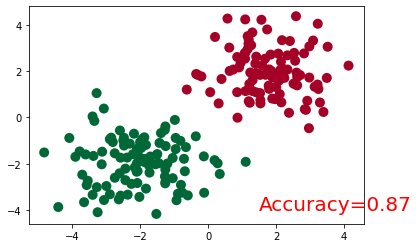

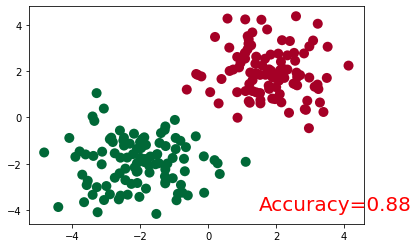

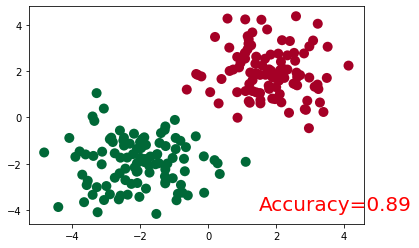

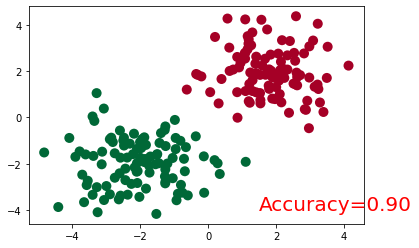

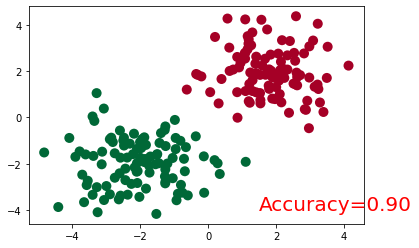

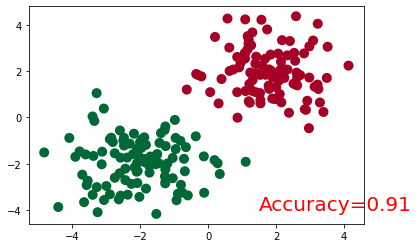

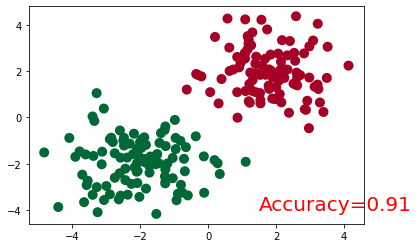

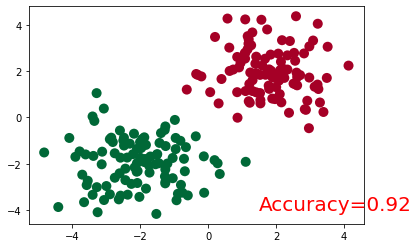

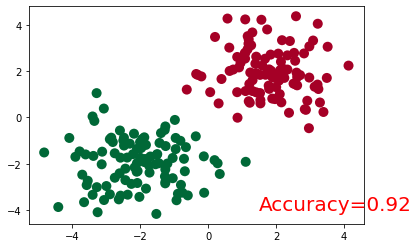

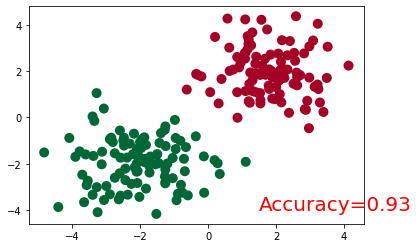

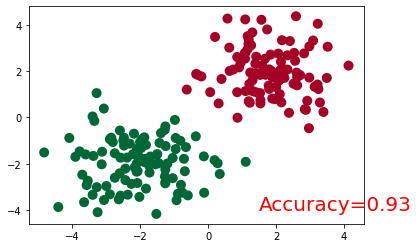

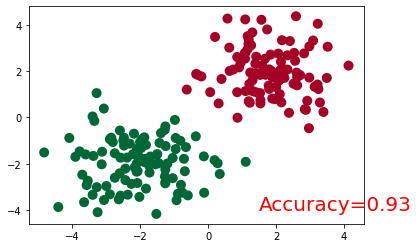

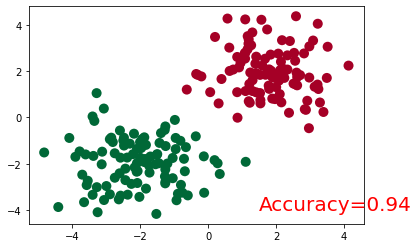

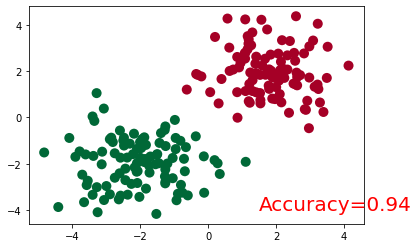

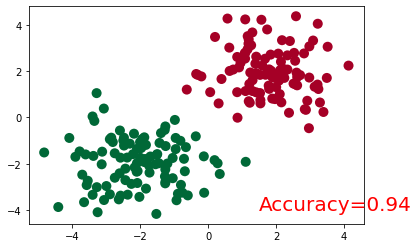

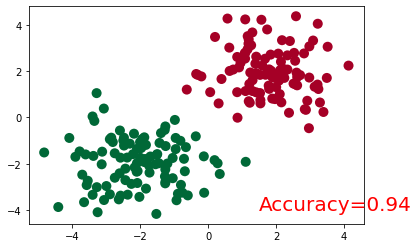

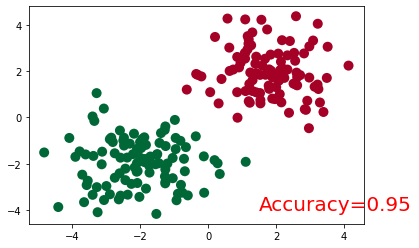

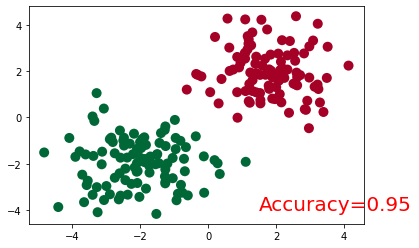

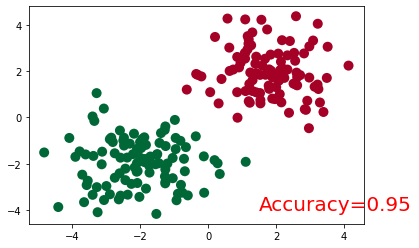

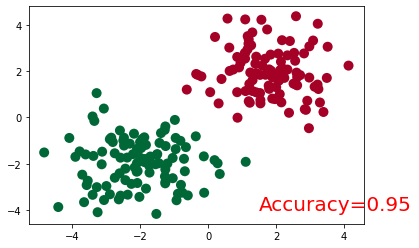

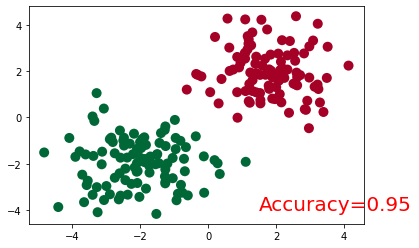

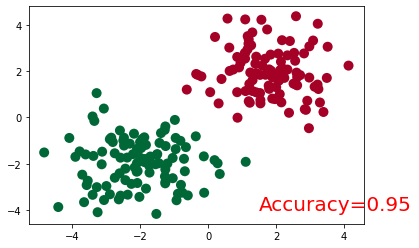

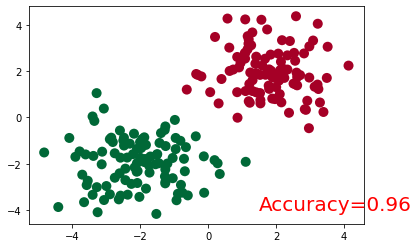

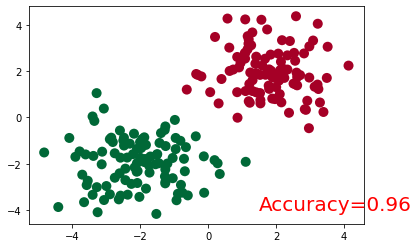

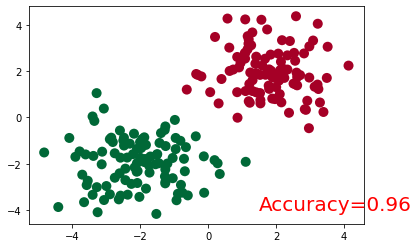

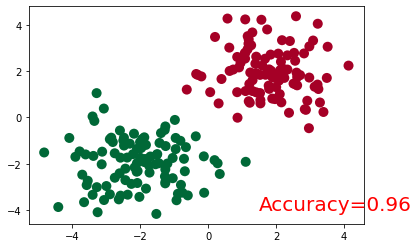

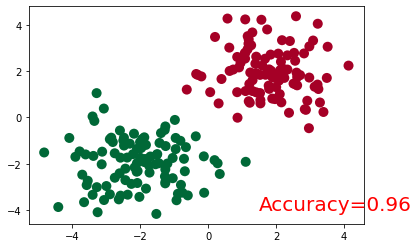

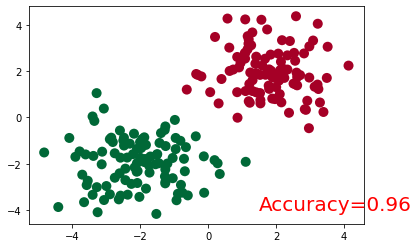

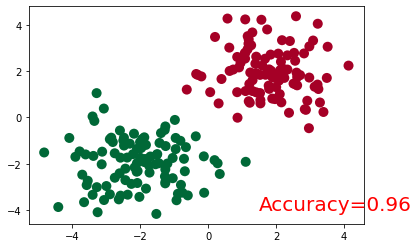

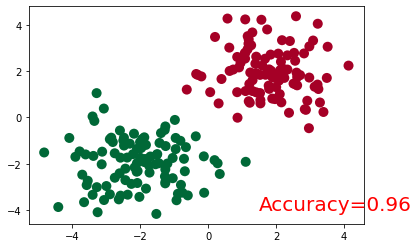

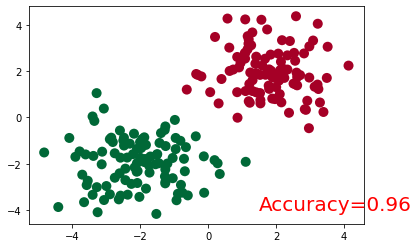

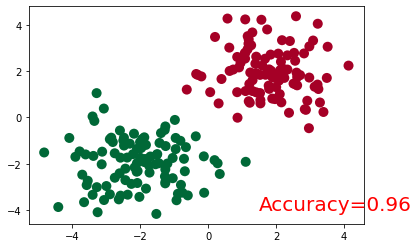

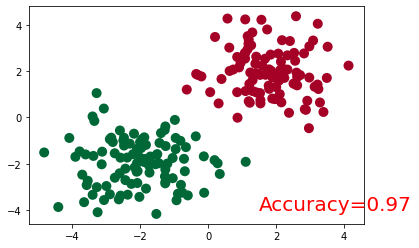

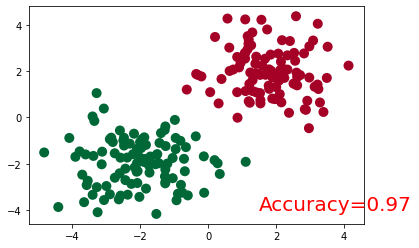

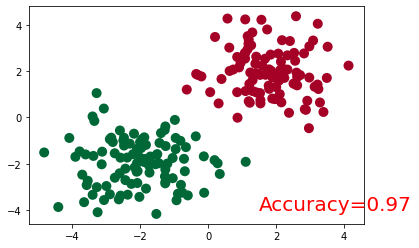

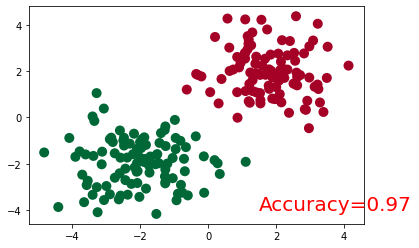

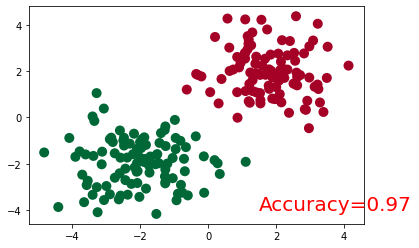

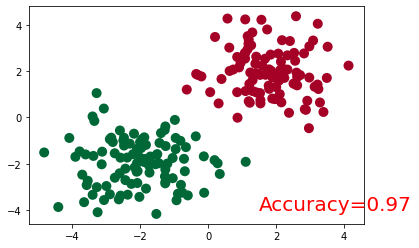

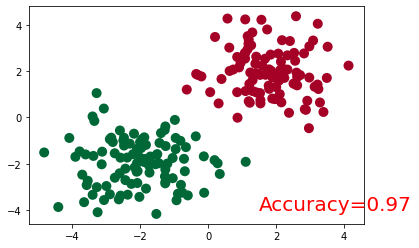

In [48]:
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

plt.ion()
for step in range(100):
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
    if step%2 == 0:
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

# Optimiser

In [49]:
LR = 0.01
BATCH_SIZE = 32

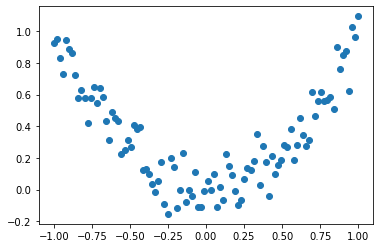

In [50]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

# plot dataset
plt.scatter(x, y)
plt.show()

In [51]:
class Net:
    def __init__(self, opt, **kwargs):
        self.x = tf.placeholder(tf.float32, [None,1])
        self.y = tf.placeholder(tf.float32, [None,1])
        l = tf.layers.dense(self.x, 20, tf.nn.relu)
        out = tf.layers.dense(l,1)
        self.loss = tf.losses.mean_squared_error(self.y, out)
        self.train = opt(LR, **kwargs).minimize(self.loss)
        
# Different Nets
net_SGD = Net(tf.train.GradientDescentOptimizer)
net_Momentum = Net(tf.train.MomentumOptimizer, momentum=0.9)
net_RMSprop = Net(tf.train.RMSPropOptimizer)
net_Adam = Net(tf.train.AdamOptimizer)

nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

C:\Users\HP\AppData\Local\Temp\ipykernel_1760\1574319343.py:5: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  l = tf.layers.dense(self.x, 20, tf.nn.relu)
C:\Users\HP\AppData\Local\Temp\ipykernel_1760\1574319343.py:6: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  out = tf.layers.dense(l,1)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


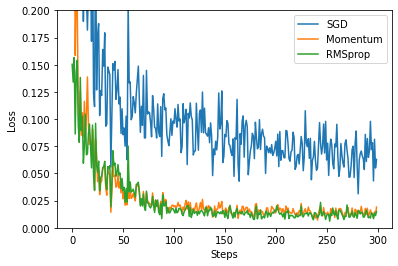

In [52]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_his = [[],[],[]]          # recode loss

#training
for step in range(300):
    index = np.random.randint(0, x.shape[0], BATCH_SIZE)
    b_x = x[index]
    b_y = y[index]
    
    for net, l_his in zip(nets, losses_his):
        _, l = sess.run([net.train, net.loss], {net.x: b_x, net.y: b_y})
        l_his.append(l)    #loss recoder
        
#plot loss history
labels = ['SGD', 'Momentum','RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label = labels[i])
plt.legend(loc = 'best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))
plt.show()

<a href="https://www.linkedin.com/in/muhammad-bilal-afzal-95b33323b/">MUHAMMAD BILAL</a>